### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

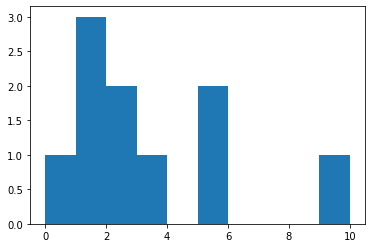

In [9]:
plt.hist(X[1])
plt.show()

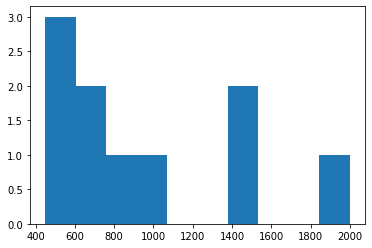

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

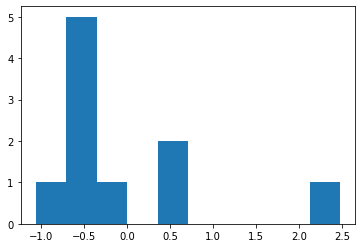

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.16152633  4.92187044  3.74295825  3.63888245] 83.8686777591771
200 [55.52677488  5.33545805  2.95584731  4.10556176] 27.76130884971163
300 [56.37093132  5.59365189  2.31880965  4.51135571] 26.150233393753666
400 [56.48288297  5.76852509  1.81060314  4.86450934] 25.716643155120174
500 [56.49772995  5.8914703   1.40248818  5.16476929] 25.44265041382003
600 [56.49969895  5.98087251  1.0732048   5.41636343] 25.26172188031118
700 [56.49996007  6.04778026  0.80665926  5.62522477] 25.141786597352684
800 [56.49999471  6.09902687  0.59041504  5.79756204] 25.06217767377951
900 [56.4999993   6.13898349  0.414711    5.93919368] 25.00930448965551
1000 [56.49999991  6.17055164  0.27179804  6.0552806 ] 24.9741785594599


array([56.49999991,  6.17055164,  0.27179804,  6.0552806 ])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062031  6.31269487 -0.36445673  6.58451458] 11.289358357594917
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182005731547
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330378
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [22]:
# lambda = lambda_/2

In [23]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#              print(i, W, err)
    return W

In [24]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49487895  5.89947315  1.04054601  5.5270874 ] 25.237558323310957
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.947089650389493
1500 [56.49717514  6.26565597 -0.17868956  6.42516923] 24.91020088702008
2000 [56.49717514  6.28924463 -0.29120292  6.51776763] 24.905377672807813
2500 [56.49717514  6.29763759 -0.33165155  6.55113988] 24.904735047224673
3000 [56.49717514  6.30065228 -0.3462019   6.56314895] 24.904645262343745
3500 [56.49717514  6.3017366  -0.35143648  6.56746949] 24.904631263168557
4000 [56.49717514  6.30212668 -0.35331967  6.56902387] 24.904628595590744
4500 [56.49717514  6.30226702 -0.35399717  6.56958307] 24.90462794248662
5000 [56.49717514  6.30231751 -0.35424091  6.56978425] 24.904627747206018


In [25]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [26]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.9046212549912
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [27]:
lam = np.linspace(1e-5, 50, 10)
lam

array([1.00000000e-05, 5.55556444e+00, 1.11111189e+01, 1.66666733e+01,
       2.22222278e+01, 2.77777822e+01, 3.33333367e+01, 3.88888911e+01,
       4.44444456e+01, 5.00000000e+01])

In [28]:
weights = []

In [34]:
for i in lam:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i)
    weights.append(W)

500 [56.49742015  5.89981731  1.04002088  5.52750782] 25.237259255530226
1000 [56.49971741  6.19554246  0.1345155   6.17185235] 24.946884474315056
1500 [56.4997175   6.26626162 -0.18017709  6.42632479] 24.910100012607877
2000 [56.4997175   6.28988752 -0.29286827  6.51906958] 24.905331877733744
2500 [56.4997175   6.29829753 -0.33339911  6.55250966] 24.904712354520164
3000 [56.4997175   6.3013197  -0.34798561  6.56454856] 24.9046314355641
3500 [56.4997175   6.30240721 -0.35323555  6.56888179] 24.904620714331248
4000 [56.4997175   6.30279862 -0.35512513  6.57044143] 24.90461923957474
4500 [56.4997175   6.30293949 -0.35580523  6.57100279] 24.90461901761903
5000 [56.4997175   6.3029902  -0.35605002  6.57120483] 24.9046189777411
500 [14.95586476  2.08110622  1.8535179   2.02764599] 1789.4409142810564
1000 [14.95586476  2.08110622  1.8535179   2.02764599] 1789.4409142810568
1500 [14.95586476  2.08110622  1.8535179   2.02764599] 1789.4409142810568
2000 [14.95586476  2.08110622  1.8535179   2.0

Text(0, 0.5, 'Значения весов')

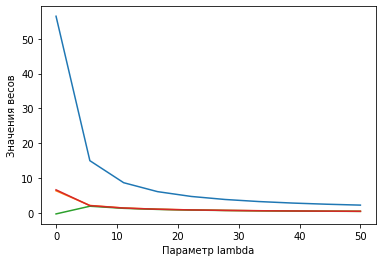

In [30]:
plt.plot(lam, weights)
plt.xlabel('Параметр lambda')
plt.ylabel('Значения весов')

In [31]:
for i in weights:
    y_pred = np.dot(i, X)
    err = calc_mse(y, y_pred)
    print(f'Значение весов = {i}, mse = {err}')

Значение весов = [56.4997175   6.3029902  -0.35605002  6.57120483], mse = 127682.09688620231
Значение весов = [14.95586476  2.08110622  1.8535179   2.02764599], mse = 3951674.5511388844
Значение весов = [8.61863896 1.34831658 1.2503903  1.33142597], mse = 1746419.2205513243
Значение весов = [6.05356927 0.99945076 0.9399689  0.99188089], mse = 959101.0100813924
Значение весов = [4.66513654 0.79440013 0.75247262 0.79044457], mse = 597287.8558314512
Значение весов = [3.79477555 0.65927626 0.62718401 0.65704595], mse = 403144.5536218256
Значение весов = [3.19811291 0.56347995 0.53760561 0.56218291], mse = 287699.4179037759
Значение весов = [2.76358681 0.4920096  0.47039294 0.49126114], mse = 213859.88388366508
Значение весов = [2.4330143  0.43663794 0.4181066  0.43623139], mse = 163992.43689074114
Значение весов = [2.17307692 0.39247379 0.37627465 0.39228959], mse = 128866.50664359669


С увеличением lambda значения весов стремятся к 0, что уложняет модель. Оптимальный параметр = 1e-5

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, нельзя. Перед запуском алгоритмов чаще всего делается либо нормализация, либо стандартизация. 
Нормализация предполагает замену признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1 (является частным случаем минимаксного масштабирования). 
Стандартизация подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1. В результате стандартизации признаковые столбцы принимают вид нормального распределения, что упрощает извлечение весов. Стандартизация содержит полезную информацию о выбросах и делает алгоритм менее к ним чувствительным, в отличие от минимаксного масштабирования, которое шкалирует данные в ограниченном диапазоне значений.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [32]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W/np.abs(W)) 
        if i % (iterations / 10) == 0:
             print(i, W, err)
    return W

In [40]:
eval_model_reg1(X_st, y, iterations=10000, alpha=0.01, lambda_=1e-8)

1000 [56.4999999   6.195601    0.13438958  6.17194881] 24.9468625045853
2000 [56.49999999  6.28995895 -0.29305334  6.51921426] 24.90532765475869
3000 [56.49999999  6.30139386 -0.34818383  6.5647041 ] 24.904630774069865
4000 [56.49999999  6.30287328 -0.35532577  6.57059898] 24.904619076624133
5000 [56.49999999  6.30306494 -0.35625107  6.57136271] 24.90461888026312
6000 [56.49999999  6.30308978 -0.35637095  6.57146165] 24.904618876964985
7000 [56.49999999  6.30309299 -0.35638648  6.57147447] 24.90461887690938
8000 [56.49999999  6.30309341 -0.35638849  6.57147613] 24.904618876908405
9000 [56.49999999  6.30309346 -0.35638875  6.57147635] 24.90461887690839
10000 [56.49999999  6.30309347 -0.35638878  6.57147638] 24.90461887690838


array([56.49999999,  6.30309347, -0.35638878,  6.57147638])